# Creating & Optimizing Equity Portfolios (without rebalancing)

---

# Getting started

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
prices = pd.read_csv("stocks.csv", index_col = "Date", parse_dates = ["Date"])
prices

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [4]:
# compute simple return
returns = prices.pct_change().dropna()
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
2017-07-11,0.003240,0.011326,0.002413,0.013057,-0.003863,0.000143,0.035343,0.003277
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [5]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2017-07-05 to 2022-06-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1257 non-null   float64
 1   BA      1257 non-null   float64
 2   DIS     1257 non-null   float64
 3   GE      1257 non-null   float64
 4   JPM     1257 non-null   float64
 5   MSFT    1257 non-null   float64
 6   TSLA    1257 non-null   float64
 7   WMT     1257 non-null   float64
dtypes: float64(8)
memory usage: 88.4 KB


In [8]:
# Function for compute the annualize risk and compund return

def ann_risk_return(returns_df): # assumes simple returns as input
    
    summary = pd.DataFrame(index = returns_df.columns)     # DateFrame
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252) # annualize risk
    log_returns = np.log(returns_df + 1)                   # log return
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1 # Compund Annualize Growth Rate
    
    return summary

In [7]:
# Compute the anuuaize risk and return of the instruments 
summary = ann_risk_return(returns.iloc[1:])
summary

,ann. Risk,CAGR
AAPL,0.320853,0.306835
BA,0.495955,-0.075152
DIS,0.306920,-0.022299
GE,0.432135,-0.213220
JPM,0.312383,0.037617
MSFT,0.294255,0.301433
TSLA,0.636075,0.596477
WMT,0.231155,0.100836


---

# Creating Random Portfolios (Part 1)

In [9]:
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
2017-07-11,0.003240,0.011326,0.002413,0.013057,-0.003863,0.000143,0.035343,0.003277
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [10]:
noa = len(returns.columns) # number of assets in each portfolio
noa

8

In [11]:
nop = 10000 # number of random portfolios
nop

10000

In [12]:
# 80,000 random floats between 0 and 1
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [13]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, ..., 0.42310646, 0.9807642 ,
        0.68482974],
       [0.4809319 , 0.39211752, 0.34317802, ..., 0.0596779 , 0.39804426,
        0.73799541],
       [0.18249173, 0.17545176, 0.53155137, ..., 0.84943179, 0.72445532,
        0.61102351],
       ...,
       [0.1412533 , 0.28570045, 0.56403074, ..., 0.34359409, 0.87588094,
        0.78291379],
       [0.1896295 , 0.45365639, 0.82695243, ..., 0.91009298, 0.92561585,
        0.38263481],
       [0.84641632, 0.3538014 , 0.67855546, ..., 0.40234825, 0.42038566,
        0.91972547]])

In [14]:
matrix.shape
# (10000, 8) -> 10000 portfolio, each portfolio with 8 assets (8 weigths)

(10000, 8)

In [15]:
# This wegiths does'not sum to one... (we need to fix that.)
matrix.sum(axis = 1, keepdims= True)

array([[4.56894411],
       [3.57956695],
       [4.24063404],
       ...,
       [3.82262761],
       [4.93698499],
       [3.99183794]])

In [16]:
# make portfolio weights summing up to 1 (its like normalization...)
# How ? Its easy!
# we devide all the elemets in a row by the sum of this row! 
# e.g -> [0.250, 0.750, 0.333, 0.3874] / 1.7204  
#        = [0.14531504, 0.43594513, 0.19355964, 0.22518019].sum()
#        = 1 
weights = matrix / matrix.sum(axis = 1, keepdims= True) 
weights

array([[0.15243548, 0.06262702, 0.04965074, ..., 0.09260487, 0.21465883,
        0.14988797],
       [0.13435477, 0.10954328, 0.09587138, ..., 0.01667182, 0.111199  ,
        0.20616891],
       [0.04303407, 0.04137394, 0.12534715, ..., 0.20030773, 0.17083656,
        0.14408777],
       ...,
       [0.03695189, 0.07473928, 0.14755053, ..., 0.08988427, 0.22913059,
        0.20481037],
       [0.03840998, 0.09188936, 0.16750151, ..., 0.18434186, 0.18748606,
        0.07750374],
       [0.21203674, 0.0886312 , 0.16998572, ..., 0.10079273, 0.10531131,
        0.2304015 ]])

In [17]:
# Senity check that the weigth sum of each portfolio sum to one.  
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

__one Portfolio__

In [18]:
# inspect the first portfolio... 
w1 = weights[0]
w1

array([0.15243548, 0.06262702, 0.04965074, 0.12066568, 0.15746942,
       0.09260487, 0.21465883, 0.14988797])

__Weights are initial weights. No rebalancing thereafter.__

In [19]:
# weighted average investment multiple over time
# returns -> returns data frame of the real stock 

# se we add one to each return, take the compund,
# and multiply the returns by the our wegits. then sum it
returns.add(1).cumprod().mul(w1).sum(axis = 1) 

# the results: the compund return over time of the portfolio,
# based on the weights strategy.

Date
2017-07-05    0.987551
2017-07-06    0.968358
2017-07-07    0.973862
2017-07-10    0.972072
2017-07-11    0.981589
                ...   
2022-06-24    3.782604
2022-06-27    3.769165
2022-06-28    3.622659
2022-06-29    3.594059
2022-06-30    3.535679
Length: 1257, dtype: float64

In [20]:
# alternatively: dot product
port1 = returns.add(1).cumprod().dot(w1) 
port1

Date
2017-07-05    0.987551
2017-07-06    0.968358
2017-07-07    0.973862
2017-07-10    0.972072
2017-07-11    0.981589
                ...   
2022-06-24    3.782604
2022-06-27    3.769165
2022-06-28    3.622659
2022-06-29    3.594059
2022-06-30    3.535679
Length: 1257, dtype: float64

In [21]:
# compute the initial return of the wegith portfolio
# (the first day...)
initial_w = returns.add(1).cumprod().mul(w1).iloc[0]
initial_w

AAPL    0.153062
BA      0.063642
DIS     0.048805
GE      0.120226
JPM     0.159048
MSFT    0.093841
TSLA    0.199117
WMT     0.149808
Name: 2017-07-05 00:00:00, dtype: float64

In [30]:
# compute the final return of the wegiths portfolio
final_w = returns.add(1).cumprod().mul(w1).iloc[-1]
final_w / final_w.sum()

# we can see that there are instuments that the return 
# increase over time, and rethen that decrease over the time...

AAPL    0.164306
BA      0.012194
DIS     0.012336
GE      0.010291
JPM     0.054074
MSFT    0.098676
TSLA    0.579729
WMT     0.068394
Name: 2022-06-30 00:00:00, dtype: float64

-> __no active rebalancing__! __Weights deviate__ from initial/target weights as prices move. <br>
-> weights of __outperforming__ (underperforming) Stocks __increase__ (decrease) over time. (__Momentum Trading Strategy__)


In [23]:
# Compute the annualize risk and return 
ann_risk_return((port1 / port1.shift() - 1).to_frame())

,ann. Risk,CAGR
0,0.341391,0.291622


---

# Creating Random Portfolios (Part 2)

__many Portfolios__

In [31]:
weights

# 10000 portfolios, each one of them with 8 weigths.

array([[0.15243548, 0.06262702, 0.04965074, ..., 0.09260487, 0.21465883,
        0.14988797],
       [0.13435477, 0.10954328, 0.09587138, ..., 0.01667182, 0.111199  ,
        0.20616891],
       [0.04303407, 0.04137394, 0.12534715, ..., 0.20030773, 0.17083656,
        0.14408777],
       ...,
       [0.03695189, 0.07473928, 0.14755053, ..., 0.08988427, 0.22913059,
        0.20481037],
       [0.03840998, 0.09188936, 0.16750151, ..., 0.18434186, 0.18748606,
        0.07750374],
       [0.21203674, 0.0886312 , 0.16998572, ..., 0.10079273, 0.10531131,
        0.2304015 ]])

In [37]:
returns.head()

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
2017-07-11,0.003240,0.011326,0.002413,0.013057,-0.003863,0.000143,0.035343,0.003277


In [32]:
# Compute the portfolio price over time 
ports = returns.add(1).cumprod().dot(weights.T)
ports # normalized prices for 10,000 portfolios

# for portfolio `0` the price in 2017-07-05	was 0.98
# and so on...

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-05,0.987551,0.993245,0.989985,1.001842,0.988475,0.993606,0.998801,0.993039,0.998128,1.002304,...,0.989050,0.987790,1.000875,0.993227,0.976638,0.989708,0.998533,0.982715,0.989387,0.992773
2017-07-06,0.968358,0.976170,0.971555,0.991056,0.970020,0.979734,0.982545,0.977052,0.986809,0.991088,...,0.966855,0.967226,0.990793,0.975687,0.953181,0.969635,0.987496,0.959149,0.971563,0.977994
2017-07-07,0.973862,0.978644,0.976642,0.996689,0.976631,0.983717,0.986938,0.981341,0.990953,0.994384,...,0.972378,0.972669,0.996221,0.980827,0.958680,0.974676,0.993720,0.962319,0.977565,0.982222
2017-07-10,0.972072,0.974173,0.974869,0.996166,0.977486,0.977812,0.986738,0.980168,0.987111,0.990525,...,0.975703,0.973414,0.995587,0.981054,0.958921,0.975395,0.994193,0.959428,0.978088,0.979459
2017-07-11,0.981589,0.982339,0.982655,1.000393,0.986969,0.983821,0.994201,0.987527,0.990834,0.996991,...,0.986983,0.983526,0.999579,0.986588,0.972090,0.986099,0.998758,0.971190,0.985844,0.986696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,3.782604,2.481710,3.351284,2.595191,3.902045,2.887012,2.541193,2.754039,2.473856,2.060992,...,3.538067,3.629657,2.313469,2.938378,4.403923,3.342824,2.855401,3.497037,3.445460,2.966226
2022-06-27,3.769165,2.474203,3.334389,2.582658,3.883472,2.878175,2.528321,2.740478,2.464622,2.053878,...,3.523527,3.610635,2.297900,2.923994,4.389121,3.328041,2.840867,3.483614,3.426796,2.956442
2022-06-28,3.622659,2.391411,3.209993,2.509441,3.731858,2.782554,2.445249,2.646301,2.397455,1.998503,...,3.384202,3.468827,2.232716,2.825313,4.203255,3.197300,2.753734,3.342126,3.297495,2.857326


In [33]:
# Compute the portfolios return 
port_ret = ports.pct_change().dropna()
port_ret # simple returns

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-06,-0.019435,-0.017191,-0.018616,-0.010766,-0.018670,-0.013962,-0.016275,-0.016100,-0.011340,-0.011190,...,-0.022441,-0.020818,-0.010074,-0.017660,-0.024018,-0.020281,-0.011053,-0.023981,-0.018015,-0.014887
2017-07-07,0.005685,0.002535,0.005236,0.005684,0.006815,0.004065,0.004471,0.004390,0.004200,0.003326,...,0.005713,0.005627,0.005478,0.005268,0.005769,0.005199,0.006303,0.003305,0.006178,0.004324
2017-07-10,-0.001839,-0.004569,-0.001816,-0.000524,0.000876,-0.006002,-0.000202,-0.001196,-0.003878,-0.003881,...,0.003419,0.000766,-0.000636,0.000232,0.000252,0.000738,0.000476,-0.003004,0.000535,-0.002814
2017-07-11,0.009791,0.008382,0.007987,0.004243,0.009702,0.006145,0.007563,0.007508,0.003772,0.006528,...,0.011561,0.010388,0.004010,0.005640,0.013733,0.010974,0.004591,0.012260,0.007929,0.007390
2017-07-12,0.004862,0.004202,0.006663,0.005780,0.006518,0.004059,0.004995,0.005076,0.006069,0.003434,...,0.004669,0.007864,0.004080,0.005548,0.004775,0.004089,0.005692,0.006818,0.005647,0.005755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,0.037074,0.033359,0.037277,0.029617,0.038281,0.032042,0.035375,0.036224,0.026702,0.029326,...,0.039529,0.038846,0.034776,0.035062,0.040086,0.040122,0.032098,0.038628,0.039012,0.031803
2022-06-27,-0.003553,-0.003025,-0.005041,-0.004829,-0.004760,-0.003061,-0.005065,-0.004924,-0.003733,-0.003452,...,-0.004110,-0.005241,-0.006730,-0.004895,-0.003361,-0.004422,-0.005090,-0.003839,-0.005417,-0.003298
2022-06-28,-0.038870,-0.033462,-0.037307,-0.028349,-0.039041,-0.033223,-0.032857,-0.034365,-0.027252,-0.026961,...,-0.039541,-0.039275,-0.028367,-0.033749,-0.042347,-0.039285,-0.030671,-0.040615,-0.037733,-0.033525


In [34]:
# Compute the annualize risk and return for each portfolio 
port_summary = ann_risk_return(port_ret)
port_summary

,ann. Risk,CAGR
0,0.341391,0.291622
1,0.293654,0.187503
2,0.318045,0.260643
3,0.253481,0.200141
4,0.340182,0.299575
...,...,...
9995,0.367157,0.258450
9996,0.266697,0.222684
9997,0.356044,0.271577
9998,0.333318,0.267210


In [35]:
summary

,ann. Risk,CAGR
AAPL,0.320853,0.306835
BA,0.495955,-0.075152
DIS,0.306920,-0.022299
GE,0.432135,-0.213220
JPM,0.312383,0.037617
MSFT,0.294255,0.301433
TSLA,0.636075,0.596477
WMT,0.231155,0.100836


__Plot the annualize rosk & return of our 10000 random portfolios, and few instruments__

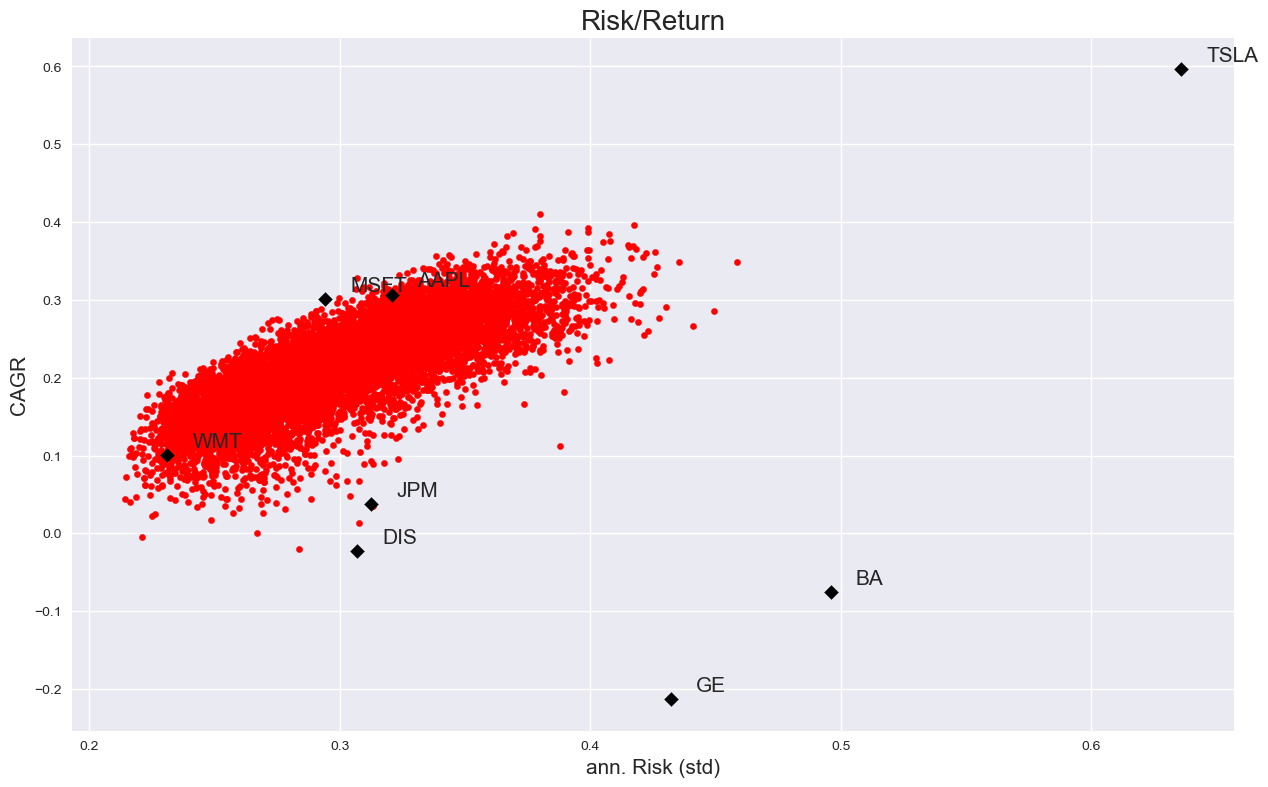

In [36]:

plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"],s= 20, color = "red")
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"], s= 50, color = "black", marker = "D")

for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

---

# Performance Measurement: Risk-adjusted Return

__Risk-adjusted-Return (RaR): CAGR per unit of Risk. (similar to Sharpe Ratio)__

In [39]:
# Risk adjusted return to the instruments:
summary["RaR"] = summary["CAGR"].div(summary["ann. Risk"])
summary

,ann. Risk,CAGR,RaR
AAPL,0.320853,0.306835,0.956308
BA,0.495955,-0.075152,-0.151531
DIS,0.306920,-0.022299,-0.072656
GE,0.432135,-0.213220,-0.493410
JPM,0.312383,0.037617,0.120418
MSFT,0.294255,0.301433,1.024395
TSLA,0.636075,0.596477,0.937747
WMT,0.231155,0.100836,0.436230


In [40]:
# Risk adjusted return to the random portfolios:
# This is all the 10000 random portfolio weigths with the 8 instruments.  
port_summary["RaR"] = port_summary["CAGR"].div(port_summary["ann. Risk"])

In [41]:
# So...which portfolio return give us the best weigth combination to our
# assets, that give us the best Risk adjusted return? 
# What is the best wegits for the assets portfolio? 

# sort -> for see the best Risk adjusted return
port_summary.sort_values("RaR")

# The lowest Risk adjusted return is the first element

,ann. Risk,CAGR,RaR
664,0.283856,-0.019909,-0.070137
5529,0.221018,-0.004981,-0.022537
4231,0.266998,0.000372,0.001392
9367,0.307632,0.012809,0.041637
5572,0.248756,0.017070,0.068622
...,...,...,...
903,0.366672,0.382652,1.043581
8795,0.369050,0.385876,1.045592
5565,0.338595,0.356714,1.053511
3054,0.306834,0.328767,1.071482


In [42]:
# See the min Risk adjusted return
vmin = port_summary.RaR.min()
vmin

-0.0701368356585522

In [43]:
# See the max
vmax = port_summary.RaR.max()
vmax

1.0801584202980552

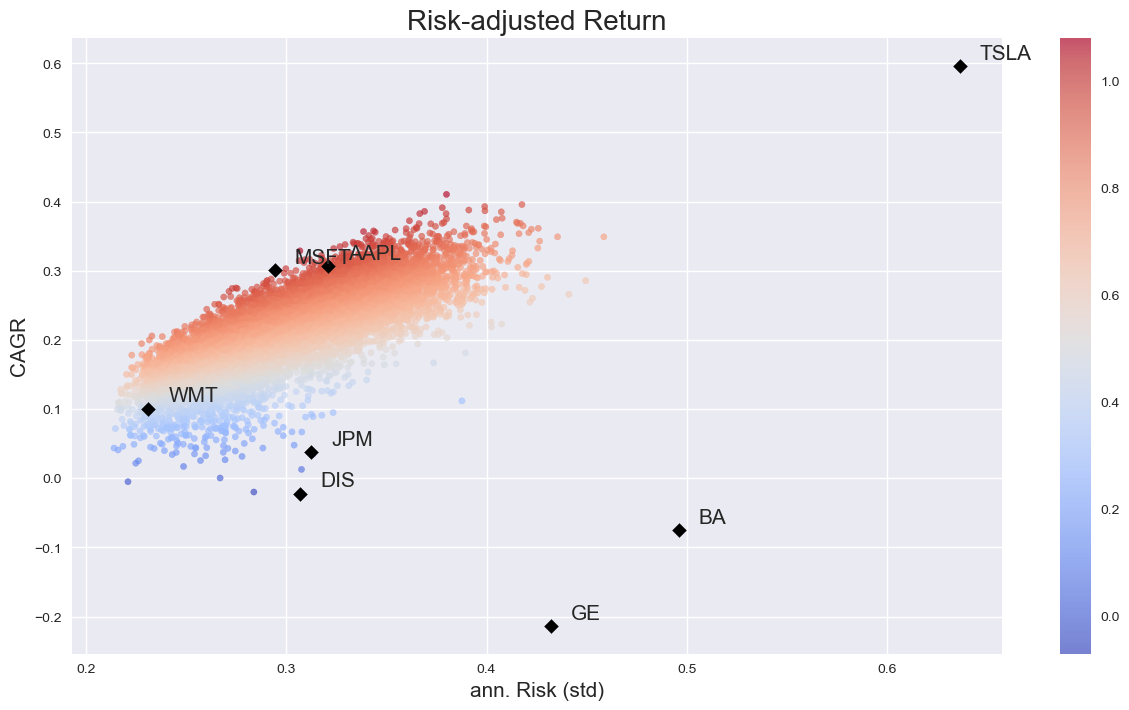

In [44]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk-adjusted Return", fontsize = 20)
plt.show()

---

# Portfolio Optimization

__In the 3 next "sections", we are going to find the optimal portfolio in the aspects:__:
1. __The optimal Rist Adjusted Return portfolio__
2. __The optimal Variance portfolio__ (the wegiths taht will produce from our portfolio the minimum variance -> minimum risk)
3. __The portfolio with optimal return portfolio__ (the wegiths taht will produce from our portfolio the maximum return)

> Let'e find the optimized portfolio wegiths.

> **What is the best wegiths for the assets below (`return` DataFtame) that can give as the portfolio weigths with the best performance?**


__Note: We are optimizing the past here (backward looking)!__

In [45]:
import scipy.optimize as sco
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress = True)

In [46]:
returns 

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033
...,...,...,...,...,...,...,...,...
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032
2022-06-28,-0.0298,-0.0001,-0.0071,-0.0124,-0.0048,-0.0317,-0.0500,-0.0141


In [47]:
# calculate portfolio CAGR (based on weights)
def port_ret(weights): # get wegiths as input
    simple_ret = returns.add(1).cumprod().dot(weights.T).pct_change() # Compute simple return
    log_returns = np.log(simple_ret + 1) # compute the log return
    cagr = np.exp(log_returns.mean() * 252) - 1 # Compund annualize growth rate
    return cagr

In [48]:
# calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    simple_ret = returns.add(1).cumprod().dot(weights.T).pct_change()
    return simple_ret.std() * np.sqrt(252)

In [49]:
# define function to be minimized 
# We want to minimized this function !
# -> (sco only supports minimize, not maximize)
# -> maximize RaR == minimize RaR * (-1)
def min_func_RaR(weights): 
     # (Compund Annualize Growth Return / Volatility) = Risk Adjusted Return 
     return -(port_ret(weights)) / port_vol(weights) #Risk-adjusted Return * (-1)

In [50]:
# number of assets
noa = len(returns.columns)
noa

8

In [51]:
# equal weights (starting point of optimization)
eweigths = np.full(noa, 1/noa)
eweigths

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [52]:
# constraint: weights must sum up to 1 -> sum of weights - 1 = 0 
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [53]:
# Define bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0, 1) for x in range(noa))
bnds

# 8 weigths. each weigth must be between 0 to 1

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [76]:
# run optimization based on function to be minimized, 
# starting with equal weights and based on respective bounds and constraints

opts = sco.minimize(min_func_RaR,     # Function to optimizer 
                    eweigths,         # the initial weights (starting point)
                    method = "SLSQP", # the optimization method
                    bounds = bnds,    # bounds 
                    constraints= cons)# constraints: all weigths must sum to 1!!

In [77]:
#output of optimization
opts

# Interpretation:
# x: the optimize wegiths for our portfolio


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.5115831298288736
       x: [ 3.713e-11  3.675e-03  6.166e-02  9.099e-01  1.194e-10
            3.649e-11  5.204e-11  2.477e-02]
     nit: 9
     jac: [ 2.705e+00 -1.891e-03 -3.560e-05 -7.823e-06  4.641e-01
            2.374e+00  9.754e+00  6.554e-04]
    nfev: 81
    njev: 9

In [78]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.        , 0.00367545, 0.06166017, 0.90989113, 0.        ,
       0.        , 0.        , 0.02477325])

In [79]:
pd.Series(data = optimal_weights,
         index = returns.columns).sort_values(ascending = False).head(20)

GE     0.9099
DIS    0.0617
WMT    0.0248
BA     0.0037
JPM    0.0000
TSLA   0.0000
AAPL   0.0000
MSFT   0.0000
dtype: float64

-> __Optimization (without bounds) does not necessarily lead to practical/factual diversification.__

In [80]:
# cagr (Compund annualize growth rate) of the optimal portfolio
cagr_opt = port_ret(optimal_weights)
cagr_opt

0.17967887223895374

In [81]:
#volatility of the optimal portfolio
vol_opt = port_vol(optimal_weights)
vol_opt

0.35122126153584654

In [82]:
#RaR of the optimal portfolio
RaR_opt = -min_func_RaR(optimal_weights)
RaR_opt

0.5115831298288736

__Plot the Risk adgusted return of the portfolios, and mark the best one__ 

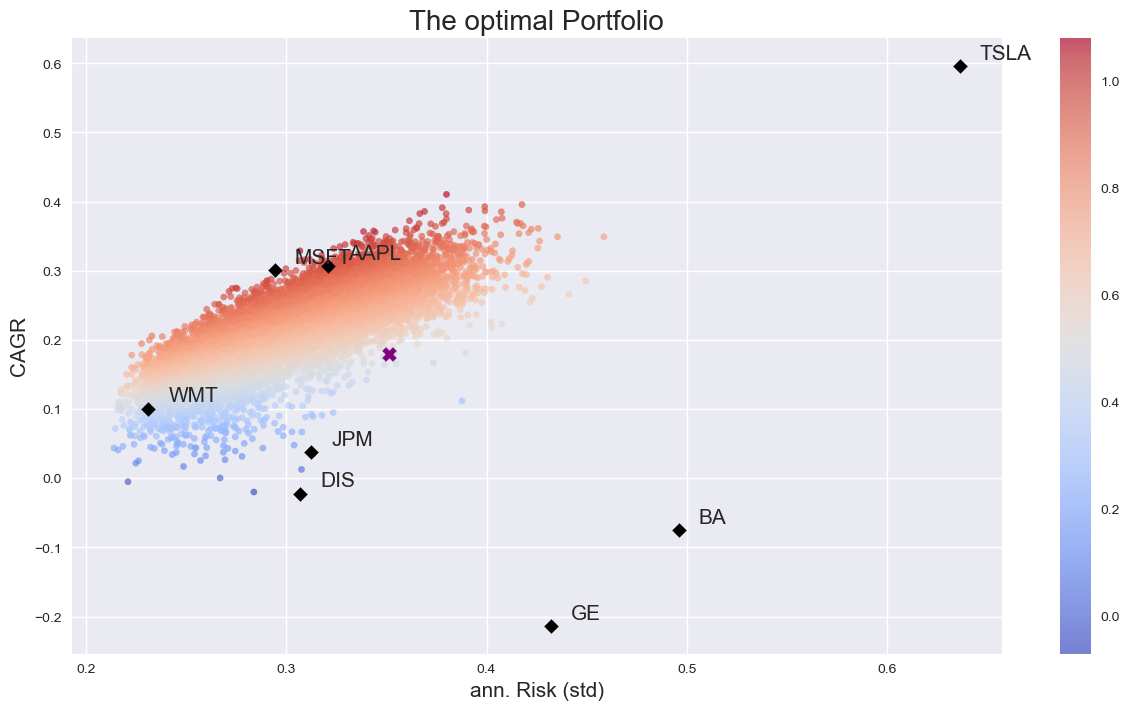

In [83]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.scatter(x = vol_opt, y = cagr_opt, s = 100, marker = "X", c = "purple") # best Portfolio
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The optimal Portfolio", fontsize = 20)
plt.show()

__Reminder: We are optimizing the past here (backward looking).__ <br>
-> Very unlikely we had selected this optimal portfolio back in 2017 (__look ahead bias__)! <br>
-> Very unlikely this will be the optimal portfolio in the future (__past performance is not a good indicator for future performance__)!

---

# Minimum Variance Portfolio

Lets find the portfolio with the most less risk. 

In [85]:
# Minimum Variance Portfolio
# Find the minimum variance portfolio -> minimize the risk. 

opts = sco.minimize(port_vol, # the function to minimize (port_vol() function)
                    eweigths, # initial weigths (start point) 
                    method = "SLSQP", #optimization method 
                    bounds = bnds, # bounds (weigths must be between [0 1])
                    constraints= cons) # constraints: sum of weigths must sum to 1. 



In [86]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.19602723834892935
       x: [ 1.315e-02  1.423e-17  1.797e-01  1.728e-01  1.244e-01
            4.038e-02  2.914e-19  4.695e-01]
     nit: 12
     jac: [ 9.601e-04  1.792e-02  5.397e-04  7.995e-05 -1.122e-05
            7.196e-04  9.472e-02 -3.247e-04]
    nfev: 109
    njev: 12

In [87]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.0131455 , 0.        , 0.17973594, 0.17280994, 0.12438404,
       0.04037906, 0.        , 0.46954552])

In [88]:
pd.Series(data = optimal_weights,
         index = returns.columns).sort_values(ascending = False).head(20)

WMT    0.4695
DIS    0.1797
GE     0.1728
JPM    0.1244
MSFT   0.0404
AAPL   0.0131
BA     0.0000
TSLA   0.0000
dtype: float64

-> __Optimization (without bounds) does not necessarily lead to practical/factual diversification.__

In [89]:
# cagr (Compund annualize growth rate) of the optimal portfolio
cagr_opt = port_ret(optimal_weights)
cagr_opt

-0.05785373178138786

In [90]:
#volatility of the optimal portfolio
vol_opt = port_vol(optimal_weights)
vol_opt

0.19602723834892935

In [91]:
#RaR of the optimal portfolio
RaR_opt = -min_func_RaR(optimal_weights)
RaR_opt

-0.295131086213682

__Plot the Risk adgusted return of the portfolios, and mark the best one__ 

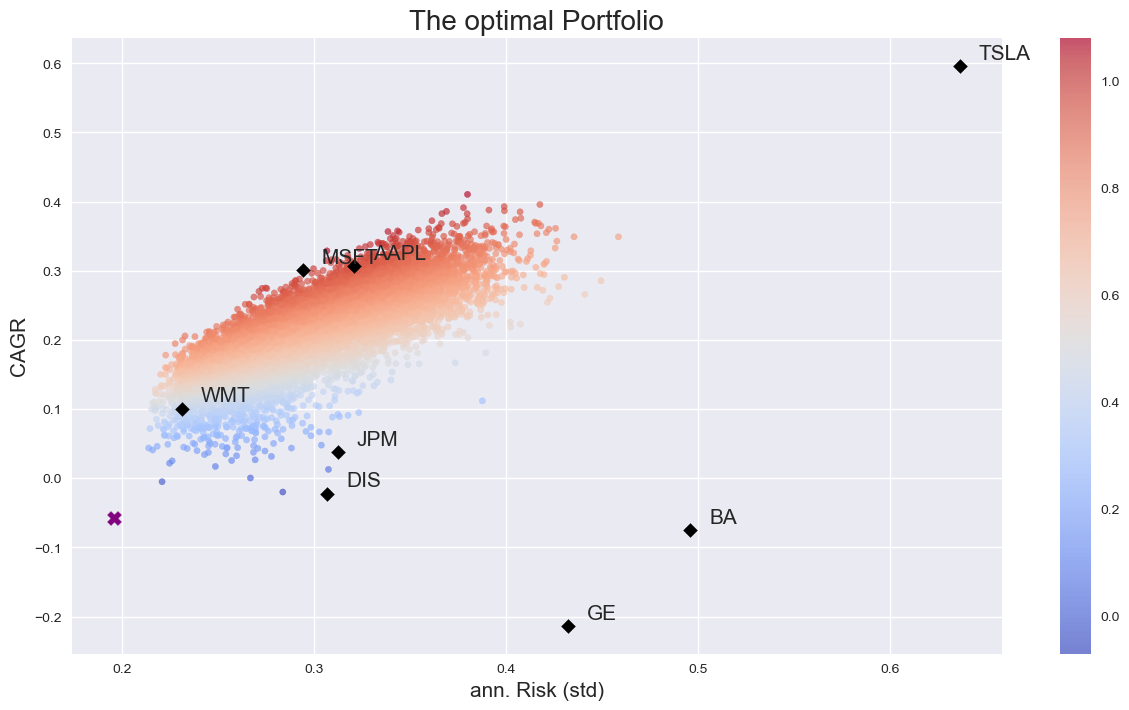

In [92]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.scatter(x = vol_opt, y = cagr_opt, s = 100, marker = "X", c = "purple") # best Portfolio
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The optimal Portfolio", fontsize = 20)
plt.show()

---

# Maximum Return Portfolio

In [124]:
#calculate portfolio CAGR (based on weights)
def port_ret(weights):
    simple_ret = returns.add(1).cumprod().dot(weights.T).pct_change()
    log_returns = np.log(simple_ret + 1)
    cagr = np.exp(log_returns.mean() * 252) - 1
    return cagr * (-1)

In [125]:
# Maximum Return Portfolio
opts = sco.minimize(port_ret, 
                    eweigths, 
                    method = "SLSQP", 
                    bounds = bnds,
                    constraints= cons)

In [126]:
#cagr of the optimal portfolio
cagr_opt = -port_ret(optimal_weights)
cagr_opt

0.5964771587288586

In [127]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.5964771587288586
       x: [ 3.400e-16  0.000e+00  5.898e-17  5.204e-18  2.255e-17
            1.596e-16  1.000e+00  6.939e-18]
     nit: 4
     jac: [ 2.189e-01  3.278e-01  3.100e-01  3.339e-01  3.080e-01
            2.235e-01  1.490e-08  2.910e-01]
    nfev: 36
    njev: 4

In [128]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0., 0., 0., 0., 0., 0., 1., 0.])

In [129]:
pd.Series(data = optimal_weights,
         index = returns.columns).sort_values(ascending = False).head(20)

TSLA   1.0000
AAPL   0.0000
MSFT   0.0000
DIS    0.0000
JPM    0.0000
WMT    0.0000
GE     0.0000
BA     0.0000
dtype: float64

-> __Optimization (without bounds) does not necessarily lead to practical/factual diversification.__

In [130]:
# cagr (Compund annualize growth rate) of the optimal portfolio
cagr_opt = -port_ret(optimal_weights)
cagr_opt

0.5964771587288586

In [131]:
#volatility of the optimal portfolio
vol_opt = port_vol(optimal_weights)
vol_opt

0.6360747646647917

In [132]:
#RaR of the optimal portfolio
RaR_opt = -min_func_RaR(optimal_weights)
RaR_opt

-0.937746931436903

__Plot the Risk adgusted return of the portfolios, and mark the best one__ 

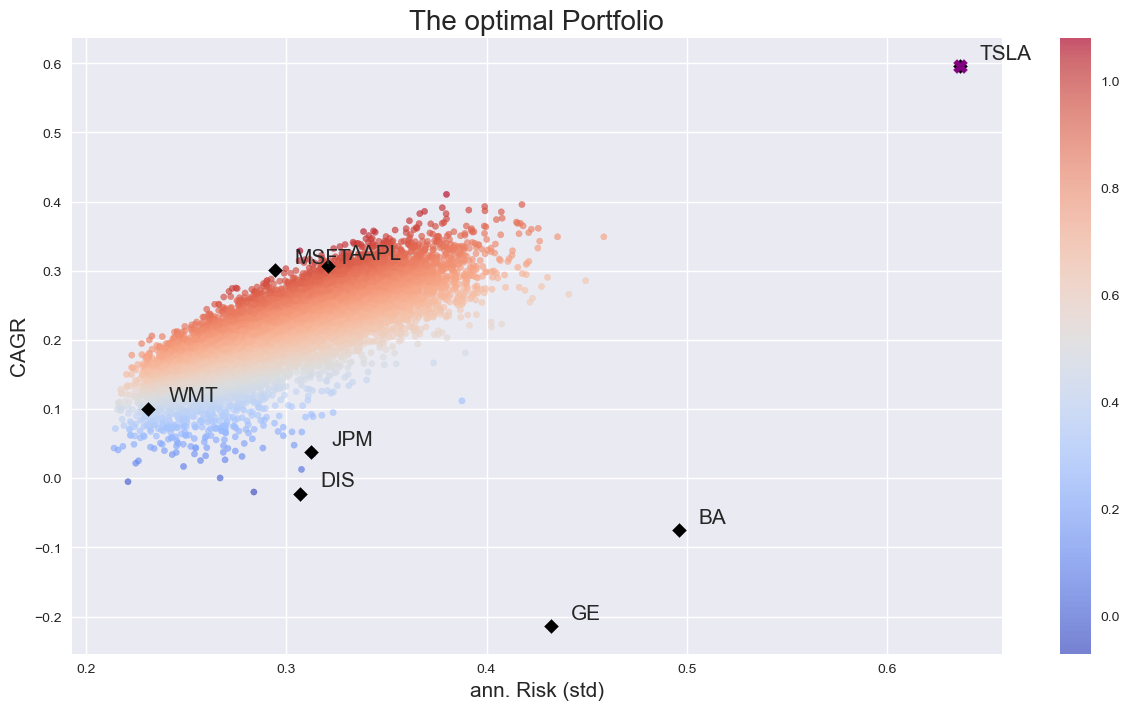

In [133]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.scatter(x = vol_opt, y = cagr_opt, s = 100, marker = "X", c = "purple") # best Portfolio
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The optimal Portfolio", fontsize = 20)
plt.show()

---

# The Efficient Frontier

> __`Find for each return level the portfolio with the lowest volatility`.__

In [134]:
# See the simple return of the conctituents
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033
...,...,...,...,...,...,...,...,...
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032
2022-06-28,-0.0298,-0.0001,-0.0071,-0.0124,-0.0048,-0.0317,-0.0500,-0.0141


In [135]:
# calculate portfolio CAGR (based on weights)
def port_ret(weights):
    simple_ret = returns.add(1).cumprod().dot(weights.T).pct_change()
    log_returns = np.log(simple_ret + 1)
    cagr = np.exp(log_returns.mean() * 252) - 1
    return cagr # Compunt annualize growth rate 

In [136]:
# calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    simple_ret = returns.add(1).cumprod().dot(weights.T).pct_change()
    return simple_ret.std() * np.sqrt(252) # annualize risk

In [137]:
# Number of asset in the portfolio... 
noa = len(returns.columns)
noa

8

In [138]:
# equal weights (starting point of optimization)
eweigths = np.full(noa, 1/noa)
eweigths

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [139]:
summary

,ann. Risk,CAGR,RaR
AAPL,0.3209,0.3068,0.9563
BA,0.4960,-0.0752,-0.1515
DIS,0.3069,-0.0223,-0.0727
GE,0.4321,-0.2132,-0.4934
JPM,0.3124,0.0376,0.1204
MSFT,0.2943,0.3014,1.0244
TSLA,0.6361,0.5965,0.9377
WMT,0.2312,0.1008,0.4362


In [140]:
# Create 100 elememts of linear space from the min -> max CAGR
tcagrs = np.linspace(summary.CAGR.min(), summary.CAGR.max(), 100)
tcagrs # evenly spaced target returns between min and max

# We did it becase we want to find for each level of
# compund annualize growth rate -> the lowest risk! 

# in other words, find me the lowest risk of for with a giveb level of CAGR. 

array([-0.21321957, -0.20504081, -0.19686206, -0.18868331, -0.18050455,
       -0.1723258 , -0.16414704, -0.15596829, -0.14778953, -0.13961078,
       -0.13143202, -0.12325327, -0.11507451, -0.10689576, -0.098717  ,
       -0.09053825, -0.08235949, -0.07418074, -0.06600198, -0.05782323,
       -0.04964447, -0.04146572, -0.03328696, -0.02510821, -0.01692945,
       -0.0087507 , -0.00057194,  0.00760681,  0.01578557,  0.02396432,
        0.03214308,  0.04032183,  0.04850058,  0.05667934,  0.06485809,
        0.07303685,  0.0812156 ,  0.08939436,  0.09757311,  0.10575187,
        0.11393062,  0.12210938,  0.13028813,  0.13846689,  0.14664564,
        0.1548244 ,  0.16300315,  0.17118191,  0.17936066,  0.18753942,
        0.19571817,  0.20389693,  0.21207568,  0.22025444,  0.22843319,
        0.23661195,  0.2447907 ,  0.25296946,  0.26114821,  0.26932697,
        0.27750572,  0.28568448,  0.29386323,  0.30204198,  0.31022074,
        0.31839949,  0.32657825,  0.334757  ,  0.34293576,  0.35

In [141]:
# Define constraints
cons = (
    
   # constraint 2: portfolio return == tcagr (target return)        
   {"type": "eq", "fun": lambda x: port_ret(x) - tcagr}, #        
    
   # constraint 2:
   # sum of weights per portfolio must sum to 1!
   {"type": "eq", "fun": lambda x: np.sum(x) - 1}
) 

# By those two constraints, now we can find the best weigths for each
# level of target return.

In [142]:
bnds =  tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [143]:
vols = []

In [144]:
# for each target return, find the portfolio with the lowest volatility

for tcagr in tcagrs: # for each target return

    # find the portfolio with the lowest volatility
    res = sco.minimize(port_vol, 
                       eweigths, 
                       method = "SLSQP", 
                       bounds = bnds, 
                       constraints = cons)
    
    # append the func res.
    # This is the minimum volatility for a given target return 
    vols.append(res["fun"]) # the minimum volatility

vols = np.array(vols)

In [145]:
# This is the minimum volatilities array (for different target return)
vols 

array([0.43213508, 0.40809365, 0.3876144 , 0.36956421, 0.35284053,
       0.3373293 , 0.32294835, 0.30962649, 0.29730308, 0.28592464,
       0.27544301, 0.2658166 , 0.25700765, 0.24897937, 0.24169787,
       0.23512991, 0.22924327, 0.22400626, 0.21938739, 0.21535525,
       0.2118785 , 0.20891356, 0.20635406, 0.20416434, 0.2023262 ,
       0.20081768, 0.1996122 , 0.19861403, 0.1977952 , 0.19714641,
       0.19665831, 0.19631487, 0.1961073 , 0.19602836, 0.19607213,
       0.1962308 , 0.19649859, 0.19686904, 0.19733649, 0.19789527,
       0.19864914, 0.19966303, 0.20091297, 0.2023944 , 0.20408295,
       0.20596206, 0.20801828, 0.21023725, 0.21260634, 0.21511445,
       0.21776795, 0.22058175, 0.22354233, 0.22678322, 0.23035965,
       0.23424039, 0.23840327, 0.24282313, 0.24747792, 0.25234744,
       0.25741329, 0.26265894, 0.26806971, 0.27363036, 0.27933075,
       0.28515974, 0.29110771, 0.29716638, 0.30332853, 0.30958823,
       0.31594022, 0.32249151, 0.32938418, 0.33657742, 0.34403

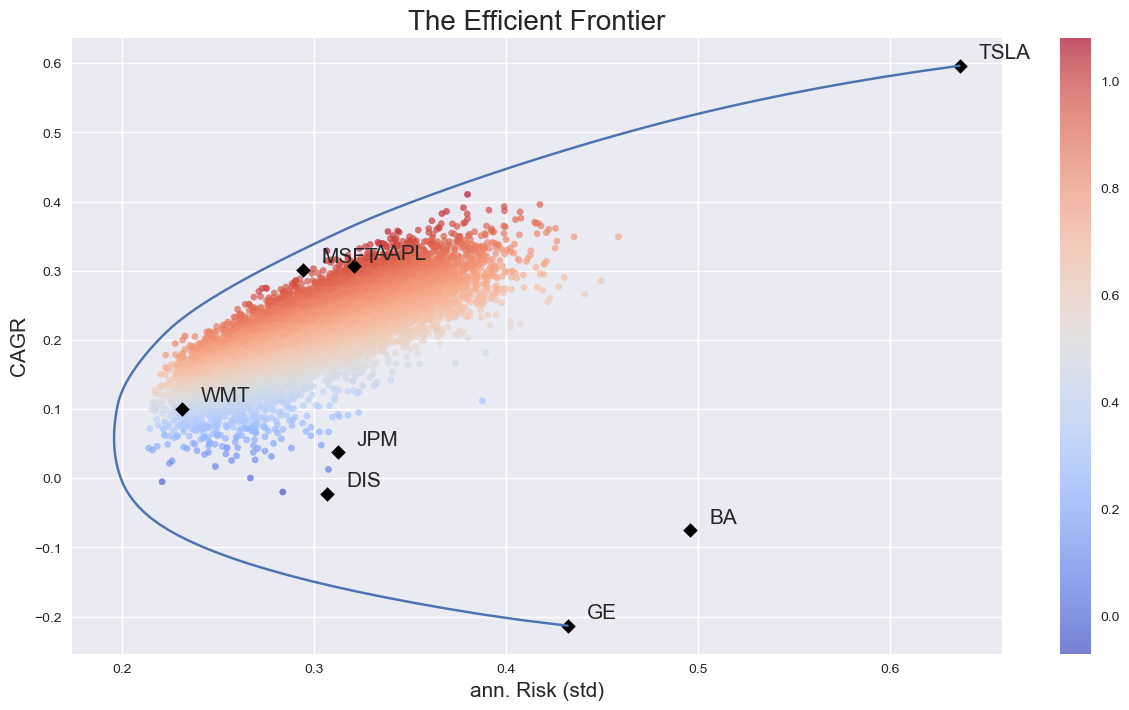

In [146]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"],s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm",
            vmin = vmin, vmax = vmax, alpha = 0.66)

plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, 
            marker = "D", c = "black")

for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, 
                        summary.loc[i, "CAGR"]+0.01), size = 15)

plt.plot(vols, tcagrs) # efficient frontier

plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The Efficient Frontier", fontsize = 20)
plt.show()